In [24]:
from sectional_v2.constants import get_plotpath
from sectional_v2.util.practical_functions import make_folders
from IPython.display import clear_output



plot_path = get_plotpath('comparison')
print(plot_path)
make_folders(plot_path)
fn_base = plot_path + '/prof_map_'
print(fn_base)

/home/ubuntu/mnts/nird/projects//Plots_OAS-DEV/global_comparison/
/home/ubuntu/mnts/nird/projects//Plots_OAS-DEV/global_comparison//prof_map_


In [25]:
from sectional_v2.util.plot.plot_maps import plot_map_diff, fix_axis4map_plot, plot_map_abs_abs_diff, plot_map,plot_map_diff_only
from useful_scit.imps import (np, xr, plt, pd) 
from sectional_v2.util.imports import get_averaged_fields
from sectional_v2.util.plot.plot_profiles import plot_profile, set_legend_area_profs, set_scalar_formatter

# load and autoreload
from useful_scit.plot import get_cmap_dic
from IPython import get_ipython

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
from matplotlib import gridspec

In [27]:
model = 'NorESM'

startyear = '2008-01'
endyear = '2009-12'
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
if avg_over_lev:
    pressure_adjust = True
p_levels = [1013.,900., 800., 700., 600.]  # used if not avg

In [28]:
cases_sec = ['SECTv21_ctrl']
cases_orig =['noSECTv21_default_dd'] 
#cases_orig =['noSECTv21_ox_ricc']

cases = cases_orig + cases_sec

## Combined plots

In [40]:
import cartopy.crs as ccrs
from sectional_v2.util.plot.plot_levlat import plot_levlat_diff, get_cbar_eq_kwargs, make_cbar_kwargs


## N_AER

## H2SO4

In [30]:
from sectional_v2.util.plot.colors import get_area_col
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from sectional_v2.data_info import get_nice_name_case

In [31]:
linests = ['solid','dashed','dotted']

In [32]:
areas = ['Global','notLand','Amazonas and surroundings', 'Polar N','Polar S']

In [33]:
import seaborn as sns

In [51]:
        
def plot_levlat_map_together(var, areas, cases, axs, var_map=None,
                            ylim = [1e3, 100], relative=True,
                             yscale='log',
                             cba_kwargs=None,
                             cbar_orientation='horizontal'
                            ):
    if axs is None:
        fig = plt.figure(figsize = [width,asp_rat*width])
        gs = gridspec.GridSpec(2, 2,height_ratios=[1,1.], width_ratios=[5,1])#width_ratios=[2, 1]) 
        ax1 = plt.subplot(gs[1,0])
        ax2 = plt.subplot(gs[1,1])
        ax3 = plt.subplot(gs[0,:], projection=ccrs.Robinson())
        axs=[ax1,ax2,ax3]
        ax2.axis('off')
        cases_nn = [get_nice_name_case(case) for case in cases]
        
        set_legend_area_profs(ax2, areas,cases_nn, linestd_nn)
    ax1 = axs[0]
    ax3 = axs[1]
    
    
    #cmapd = get_cmap_dic(areas)
    
    #linestd=dict()
    #linestd_nn=dict()
    #for case, ls in zip(cases, linests):
    #    linestd[case]=ls
    #    linestd_nn[get_nice_name_case(case)]=ls
    ax =ax1# plt.subplots(1, figsize=[6,8])
    
    #for area in areas:
    cases_dic = get_averaged_fields.get_levlat_cases(cases, [var], startyear, endyear,
                                                 pressure_adjust=pressure_adjust)

    

    plot_levlat_diff(var, cases[0], cases[1], cases_dic,
                         cbar_orientation=cbar_orientation,
                         relative=relative,
                         ylim=ylim,
                         yscale=yscale,
                         ax=ax1,
                         #norm=norm, 
                     )
    
    ax.grid(False, which='both')
    sns.despine(ax=ax)
    ax.set_yscale('log')
    
    
    set_scalar_formatter(ax)
    
    # maps:
    if var_map is not None:
        var=var_map
    maps_dic = get_averaged_fields.get_maps_cases(cases,[var],startyear, endyear,
                                       avg_over_lev=avg_over_lev,
                                       pmin=pmin,
                                       pressure_adjust=pressure_adjust)
    plot_map_diff_only(var, cases, maps_dic, relative=True, cbar_equal=True,
                              kwargs_diff={}, axs=ax3, cmap_diff='RdBu_r', cbar_loc='under')
    
    
    #plt.tight_layout()
    return 

def plt_prof_map_together_ls(var1,var2, areas, cases, asp_rat=1, width=5.5, varl_map=None):
    nvars = 2
    fig = plt.figure(figsize = [width*nvars,asp_rat*width*nvars])
    gs = gridspec.GridSpec(2, nvars+1,height_ratios=[1,1.], width_ratios=[5,5,1])#width_ratios=[2, 1]) 
    axs_prof = []
    axs_maps = []
    ax1 = plt.subplot(gs[1,0])
    ax2 = None#plt.subplot(gs[1,1+i*2])
    ax3 = plt.subplot(gs[0,0], projection=ccrs.Robinson())
    print(var1,areas, cases, [ax1,ax3])
    if varl_map is None:
        var1m =None
        var2m =None
    else:
        var1m=varl_map[0]
        var2m=varl_map[1]
        
    plot_levlat_map_together(var1, areas, cases, [ax1,ax3], var_map=var1m)
    axs_maps.append(ax3)
    axs_prof.append(ax1)
    ax1 = plt.subplot(gs[1,1])
    ax2 = plt.subplot(gs[1,2])
    ax3 = plt.subplot(gs[0,1], projection=ccrs.Robinson())
    plot_levlat_map_together(var2, areas, cases, [ax1,ax3], var_map=var2m)
    axs_maps.append(ax3)
    axs_prof.append(ax1)
    
    
    ax2.axis('off')
    linestd=dict()
    linestd_nn=dict()
    for case, ls in zip(cases, linests):
        linestd[case]=ls
        linestd_nn[get_nice_name_case(case)]=ls
    ax =ax1# plt.subplots(1, figsize=[6,8])
    cases_nn = [get_nice_name_case(case) for case in cases]
    
    #set_legend_area_profs(ax2, areas,cases_nn, linestd_nn)
    
    
    ax1.yaxis.set_ticklabels([])
    ax1.set_ylabel('')
    return fig, axs_maps, axs_prof

## NA-mode

In [35]:
cases

['noSECTv21_default_dd', 'SECTv21_ctrl']

N_AER ['Global', 'notLand', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_default_dd', 'SECTv21_ctrl'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7f1892521a20>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f1892238eb8>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/N_AER_2008-01-2009-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl/N_AER_2008-01-2009-12_avg2lev850.nc
['SECTv21_ctrl']
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/

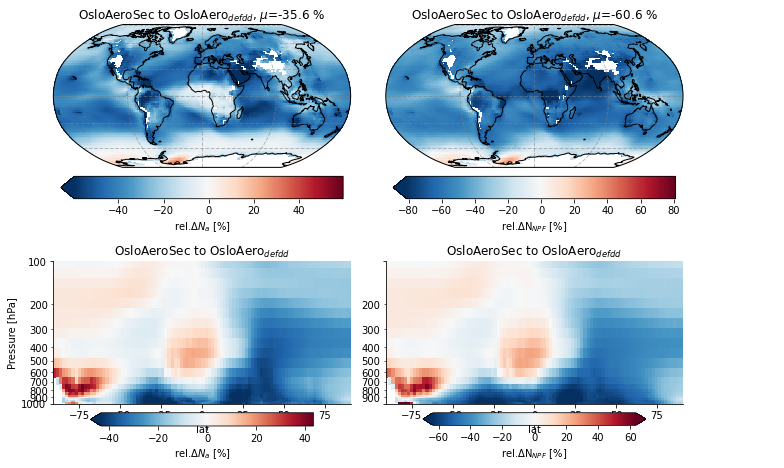

In [52]:
varl = ['N_AER','NCONC01']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases, asp_rat=.6, width=5.5)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

N_AER ['Global', 'notLand', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_default_dd', 'SECTv21_ctrl'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7f1895e5f668>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f1896dab978>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/SECTv21_ctrl/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/noSECTv21_default_dd/N_AER_2008-01-2009-12_avg2lev850.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/map_means//NorESM/SECTv21_ctrl/N_AER_2008-01-2009-12_avg2lev850.nc
['SECTv21_ctrl']
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/levlat_means//NorESM/noSECTv21_default_dd/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/

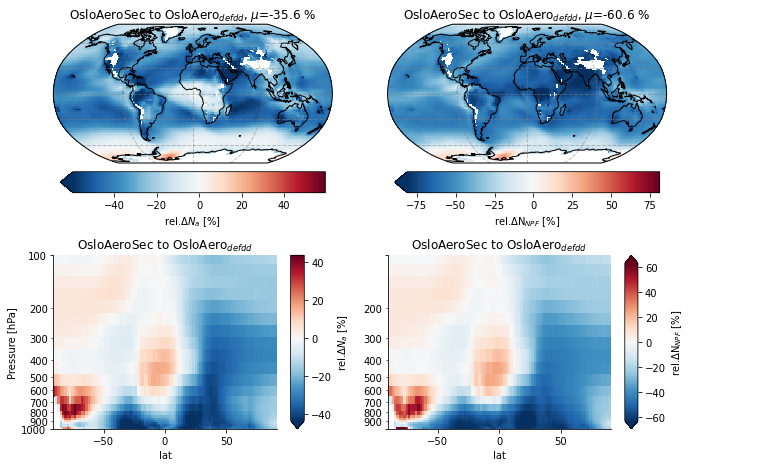

In [50]:
varl = ['N_AER','NCONC01']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases, asp_rat=.6, width=5.5)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
#axs_prof[0].set_xlim([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

SOA_NA ['Global', 'notLand', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_default_dd', 'SECTv21_ctrl'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7f069f233278>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f069f2168d0>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/Global/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/Global/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/SOA_NA_2008-01-2009-12.nc
Loading file /home/

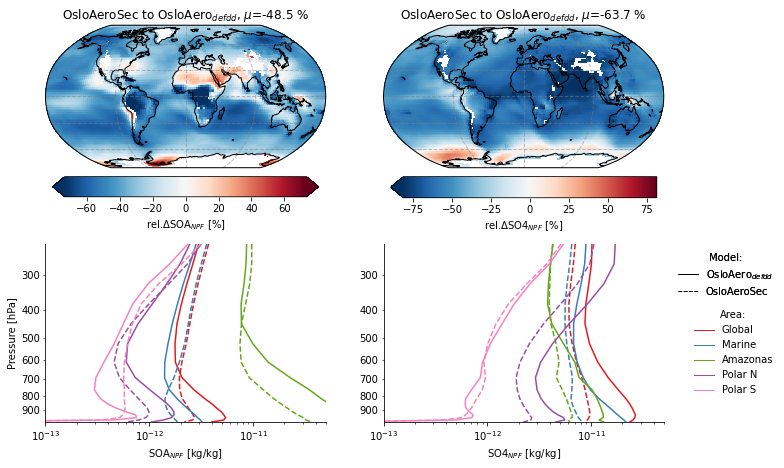

In [16]:
varl = ['SOA_NA','SO4_NA']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases, asp_rat=.6, width=5.5)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
axs_prof[0].set_xlim([1e-13,5e-11])
axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

## AREL,AWNC

AREL_incld ['Global', 'notLand', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_default_dd', 'SECTv21_ctrl'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7f069d5e70f0>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f069d556c18>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/Global/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/Global/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/AREL_incld_2008-01-2009-1

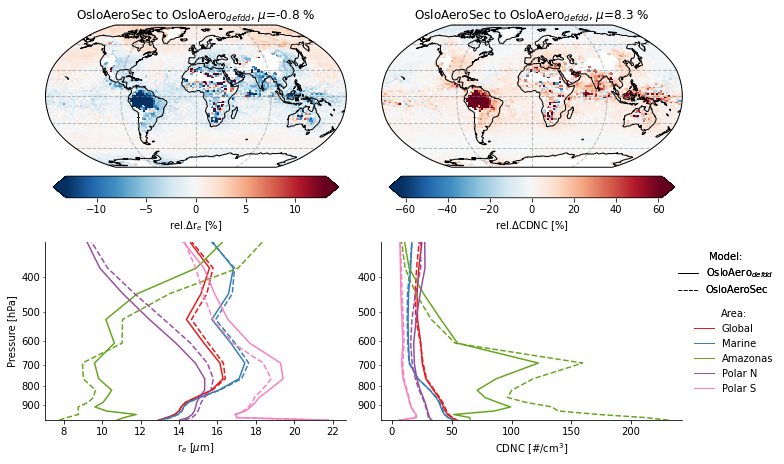

In [17]:

varl = ['AREL_incld','AWNC_incld']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases, asp_rat=.6, width=5.5)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
axs_prof[0].set_xscale('linear')#([1e-13,5e-11])
axs_prof[1].set_xscale('linear')#([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

## AREL,AWNC,ACTREL,ACTNL

AREL_incld ['Global', 'notLand', 'Amazonas and surroundings', 'Polar N', 'Polar S'] ['noSECTv21_default_dd', 'SECTv21_ctrl'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7f06c0485e80>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f06a3043630>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/Global/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/Global/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/AREL_incld_2008-01-2009-1

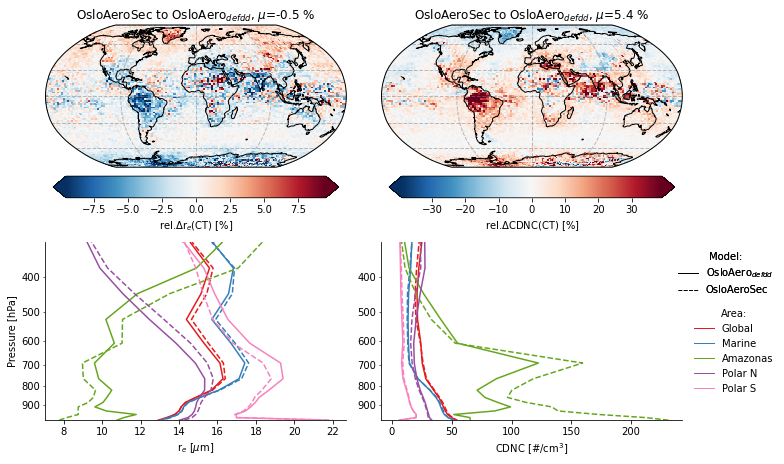

In [18]:

varl = ['AREL_incld','AWNC_incld']
varl_maps=['ACTREL_incld','ACTNL_incld']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases, asp_rat=.6, 
                                                   width=5.5, varl_map=varl_maps)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
axs_prof[0].set_xscale('linear')#([1e-13,5e-11])
axs_prof[1].set_xscale('linear')#([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
plt.savefig(fn_figure + 'png')
plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

# Other areas

In [19]:
areas=['Global','landOnly','notLand', 'Polar N','Polar S']#,'Boreal forest']

In [20]:
from sectional_v2.util.plot.plot_maps import make_box

## NA-mode

SOA_NA ['Global', 'landOnly', 'notLand', 'Polar N', 'Polar S'] ['noSECTv21_default_dd', 'SECTv21_ctrl'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7f069d622b00>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f06a30a77b8>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/SO4_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/Global/SOA_NA_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/Global/SO4_NA_2008-01-2009-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/landOnly/SOA_NA_2008-01-2009-12.nc 
Did no

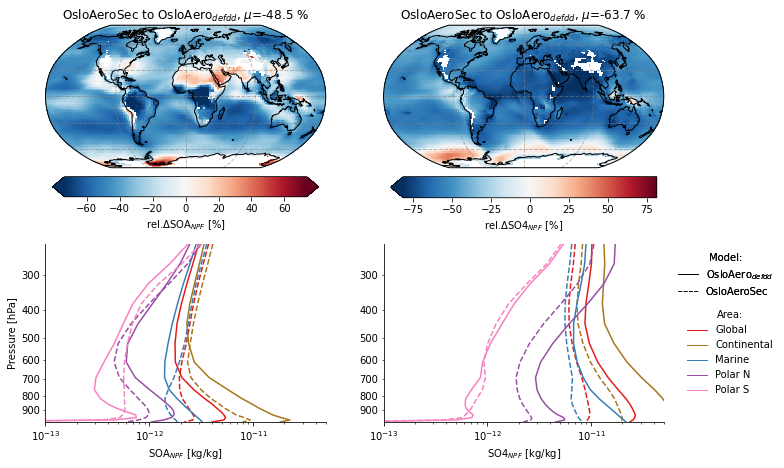

In [21]:
varl = ['SOA_NA','SO4_NA']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases, asp_rat=.6, width=5.5)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
axs_prof[0].set_xlim([1e-13,5e-11])
axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

## AREL,AWNC,ACTREL...

AREL_incld ['Global', 'landOnly', 'notLand', 'Polar N', 'Polar S'] ['noSECTv21_default_dd', 'SECTv21_ctrl'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7f069d736ef0>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f069d8da208>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/Global/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/Global/AWNC_incld_2008-01-2009-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/landOnly/AREL_incld_20

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/landOnly/AWNC_incld_2008-01-2009-12.nc 
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/landOnly/AWNC_incld_2008-01-2009-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/landOnly/AWNC_incld_2008-01-2009-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/landOnly/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/landOnly/AWNC_incld_2008-01-2009-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/notLand/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/notLand/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/notLand/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Polar_N/AREL_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Polar_N/AWNC_incld_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorE

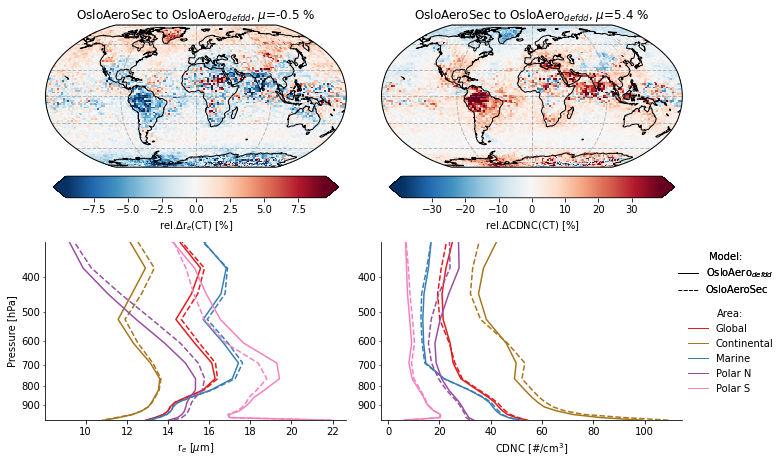

In [22]:

varl = ['AREL_incld','AWNC_incld']
varl_maps=['ACTREL_incld','ACTNL_incld']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases, asp_rat=.6, 
                                                   width=5.5, varl_map=varl_maps)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
axs_prof[0].set_xscale('linear')#([1e-13,5e-11])
axs_prof[1].set_xscale('linear')#([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

## FREQL,FREQI

FREQL ['Global', 'landOnly', 'notLand', 'Polar N', 'Polar S'] ['noSECTv21_default_dd', 'SECTv21_ctrl'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7f069f42f4e0>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f069d92b438>]
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/FREQL_2008-01-2009-12.nc 
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/FREQL_2008-01-2009-12.nc 
Saving dataset to: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/FREQL_2008-01-2009-12.nc
Did not find profile mean with filename: /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/FREQI_2008-01-2009-12.nc 
<xarray.DataArray 'time' (time: 24)>
array([ 396.,  425.,  456.,  486.,  517.,  54

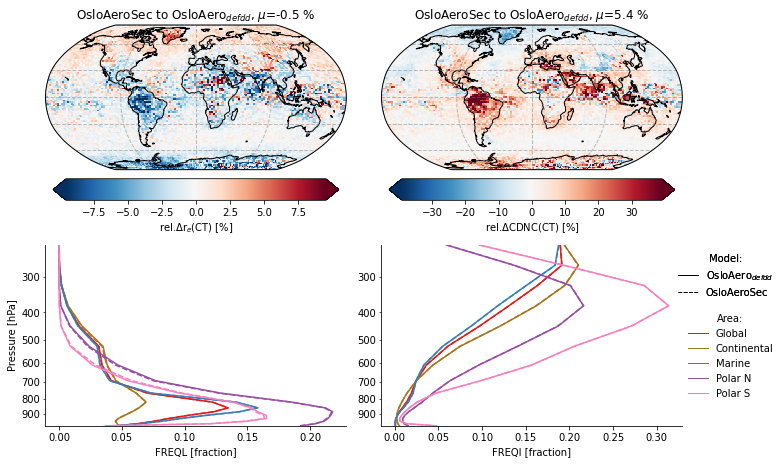

In [23]:

varl = ['FREQL','FREQI']
varl_maps=['ACTREL_incld','ACTNL_incld']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases, asp_rat=.6, 
                                                   width=5.5, varl_map=varl_maps)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
axs_prof[0].set_xscale('linear')#([1e-13,5e-11])
axs_prof[1].set_xscale('linear')#([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()

## N_AER, NCONC01

N_AER ['Global', 'landOnly', 'notLand', 'Polar N', 'Polar S'] ['noSECTv21_default_dd', 'SECTv21_ctrl'] [<matplotlib.axes._subplots.AxesSubplot object at 0x7f069f3d4fd0>, <cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x7f069f66c128>]
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/Global/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/Global/N_AER_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/SECTv21_ctrl/Global/NCONC01_2008-01-2009-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_OAS-DEV//means/profile_means//NorESM/noSECTv21_default_dd/landOnly/N_AER_2008-01-2009-12.nc
Did not find profile mean with filena

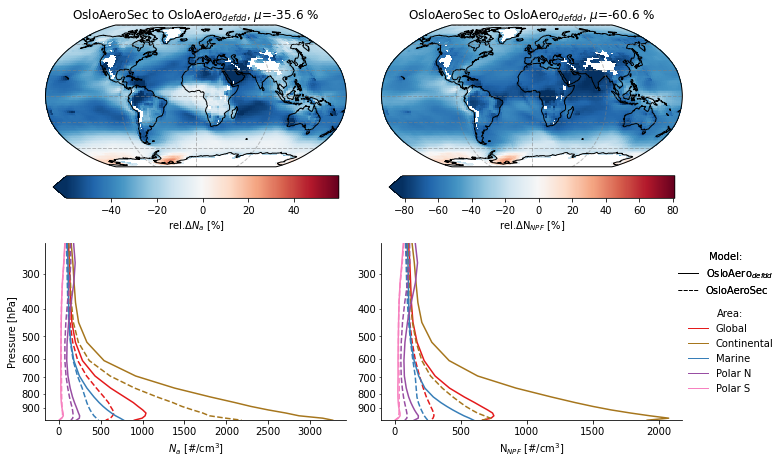

In [24]:

varl = ['N_AER','NCONC01']
varl_maps=None#['ACTREL','ACTNL']
fig, axs_maps, axs_prof = plt_prof_map_together_ls(*varl, areas, cases, asp_rat=.6, 
                                                   width=5.5, varl_map=varl_maps)
plt.tight_layout()
vars_n = '_'.join(varl)
fn_figure = '%s%s_%s-%s.'%(fn_base,vars_n,startyear, endyear)
print(fn_figure)
axs_prof[0].set_xscale('linear')#([1e-13,5e-11])
axs_prof[1].set_xscale('linear')#([1e-13,5e-11])
#axs_prof[1].set_xlim([1e-13,5e-11])
#plt.savefig(fn_figure + 'png')
#plt.savefig(fn_figure + 'pdf', dpi=300)

plt.show()